<a href="https://colab.research.google.com/github/Prajwal270/TensorFlow1.1/blob/master/tf_cnn_with_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imoprting required libraires
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [3]:
(train_image, train_label),(test_image,test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
train_label.shape

(60000,)

In [6]:
test_image.shape

(10000, 28, 28)

In [7]:
test_label.shape

(10000,)

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

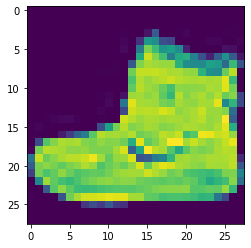

In [9]:
plt.imshow(train_image[0])

In [10]:
train_label[0]

9

In [12]:
#Normalizing the image

train_image.dtype

dtype('uint8')

In [0]:
train_image = train_image/255.0
test_image = test_image/255.0

In [16]:
train_image.dtype

dtype('float64')

In [17]:
train_image.shape

(60000, 28, 28)

In [18]:
test_image.shape

(10000, 28, 28)

In [0]:
train_image = train_image.reshape(60000,28,28,1)
test_image = test_image.reshape(10000, 28 ,28,1)

In [0]:
# The Datatype got changed

In [21]:
# Now we define our model 
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
                             
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [23]:
model.fit(train_image, train_label, validation_data=(test_image, test_label), epochs=5, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.5081 - acc: 0.8177 - val_loss: 0.3722 - val_acc: 0.8677
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3347 - acc: 0.8793 - val_loss: 0.3336 - val_acc: 0.8803
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2904 - acc: 0.8935 - val_loss: 0.3157 - val_acc: 0.8860
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2609 - acc: 0.9031 - val_loss: 0.2847 - val_acc: 0.8957
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2356 - acc: 0.9132 - val_loss: 0.2726 - val_acc: 0.9012


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [25]:
p = model.evaluate(test_image, test_label)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.2726 - acc: 0.9012


In [26]:
p

[0.27259183789491653, 0.9012]

### Visualizing the Convolutions and Pooling

In [27]:
print(test_label[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


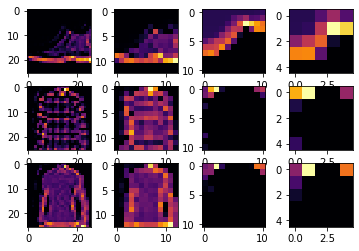

In [28]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)